In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/Untitled folder/wav

/content/gdrive/My Drive/Untitled folder/wav


In [ ]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [ ]:
num_rows = 128
num_columns = 128
num_channels = 3

num_epochs = 100
num_batch_size = 13
num_speakers = 10
num_seconds = 2.9
fine_tune_at = 120
base_lr = 0.0001

In [ ]:
featuresdf = data_load.make_dataframe_class_no(num_speakers, './', num_rows, num_columns, num_seconds)

Finished feature extraction from  970  files


In [ ]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]

In [ ]:
base_model = learn.get_mobilenet(num_rows, num_columns, num_channels, fine_tune_at)

9412608/9406464 [==============================] - 0s 0us/step
Number of layers in the base model:  155
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][

In [ ]:
model = learn.build_model_mobilenet(base_model, num_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 1,637,706
Non-trainable params: 633,088
_________________________________________________________________


In [ ]:
learn.compile_model_pretrained_net(model, base_lr)

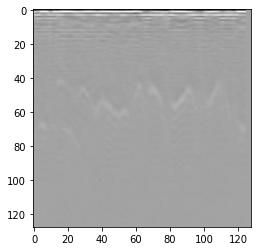

In [ ]:
path = 'id10001/9mQ11vBs1wc/00004.wav'
render.show_mfccs(path, num_rows, num_columns, num_seconds)

In [ ]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 1,637,706
Non-trainable params: 633,088
_________________________________________________________________
25/25 [==============================] - 8s 311ms/step - loss: 2.6690 - accuracy: 0.0606
Pre-training accuracy: 6.0567%


In [13]:
class_weight = learn.calculate_class_weight(featuresdf)
history = learn.train_model_class_weights(model, result_sets, num_epochs, num_batch_size, 'MobileNet2', 'default', 'MobileNet2', class_weight)

Epoch 1/100
60/60 [==============================] - ETA: 0s - loss: 9.0324 - accuracy: 0.3724
Epoch 00001: val_loss improved from inf to 2.39733, saving model to saved_models/weights.best.MobileNet2.hdf5
60/60 [==============================] - 21s 356ms/step - loss: 9.0324 - accuracy: 0.3724 - val_loss: 2.3973 - val_accuracy: 0.0722
Epoch 2/100
60/60 [==============================] - ETA: 0s - loss: 4.2714 - accuracy: 0.7332
Epoch 00002: val_loss did not improve from 2.39733
60/60 [==============================] - 17s 286ms/step - loss: 4.2714 - accuracy: 0.7332 - val_loss: 2.4864 - val_accuracy: 0.1804
Epoch 3/100
60/60 [==============================] - ETA: 0s - loss: 2.1639 - accuracy: 0.8853
Epoch 00003: val_loss improved from 2.39733 to 2.11225, saving model to saved_models/weights.best.MobileNet2.hdf5
60/60 [==============================] - 18s 293ms/step - loss: 2.1639 - accuracy: 0.8853 - val_loss: 2.1122 - val_accuracy: 0.2320
Epoch 4/100
60/60 [=========================

In [14]:
evaluate.evaluate_model(model, 'MobileNet2', result_sets)

Training Accuracy:  0.9007731676101685
Testing Accuracy:  0.5154638886451721


In [15]:
evaluate.display_metrics(model, 'MobileNet2', result_sets)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.50      0.25      0.33        16
           1       0.65      0.72      0.68        18
           2       0.52      0.77      0.62        43
           3       0.50      0.35      0.41        20
           4       1.00      0.08      0.14        13
           5       0.79      0.37      0.50        30
           6       0.59      0.71      0.65        14
           7       0.48      0.69      0.56        16
           8       0.39      0.58      0.47        12
           9       0.19      0.25      0.21        12

    accuracy                           0.52       194
   macro avg    

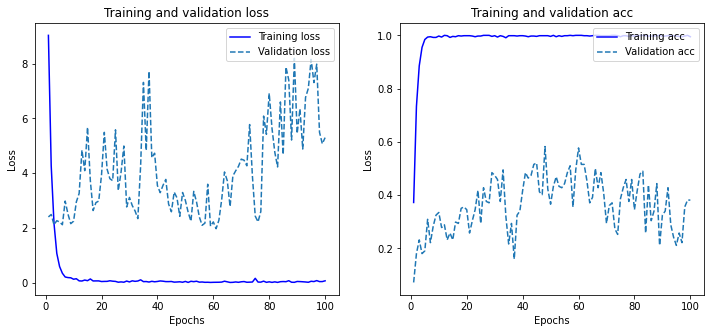

In [16]:
evaluate.plot_history(history)